# Desafio Cientista de Dados

***Introdução***

Olá candidato(a), o objetivo deste desafio é testar os seus conhecimentos sobre a resolução de problemas de negócios, análise de dados e aplicação de modelos preditivos. Queremos testar seus conhecimentos dos conceitos estatísticos de modelos preditivos, criatividade na resolução de problemas e aplicação de modelos básicos de machine learning.  É importante deixar claro que não existe resposta certa e que o que nos interessa é sua capacidade de descrever e justificar os passos utilizados na resolução do problema.

***Desafio***

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado *PProductions*, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

***Dicionário dos dados***

A base de dados de treinamento contém 15 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

Series_Title – Nome do filme

Released_Year - Ano de lançamento

Certificate - Classificação etária

Runtime – Tempo de duração

Genre - Gênero

IMDB_Rating - Nota do IMDB

Overview - Overview do filme

Meta_score - Média ponderada de todas as críticas

Director – Diretor

Star1 - Ator/atriz #1

Star2 - Ator/atriz #2

Star3 - Ator/atriz #3

Star4 - Ator/atriz #4

No_of_Votes - Número de votos

Gross - Faturamento


In [ ]:
# importando bibliotecas e configurando os estilos dos gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import panel as pn
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
pn.extension('plotly')
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.express as px
from IPython.display import display
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle
import subprocess
import warnings as ws
ws.filterwarnings('ignore')

In [ ]:
# importando e nomeando o dataframe
df_filme = pd.read_csv('/content/drive/MyDrive/Desafio_Indicium_Ciência_de_Dados/desafio_imdb.csv')

In [ ]:
# criando uma cópia do dataframe para possíveis modificações
df_filme_copy = df_filme.copy()

## Conhecendo e aplicando tratamento aos dados

In [ ]:
# retornando o número de linhas e colunas
df_filme.shape
print(f'O dataset possui {df_filme.shape[0]} linhas e {df_filme.shape[1]} colunas.')

O dataset possui 999 linhas e 16 colunas.


In [ ]:
# retornando o nome das colunas
df_filme.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [ ]:
# removendo a coluna 'Unnamed: 0' se existir
if 'Unnamed: 0' in df_filme.columns:
    df_filme = df_filme.drop('Unnamed: 0', axis=1)

In [ ]:
# quantas informações temos dentro de cada coluna?
df_filme.nunique()

,0
Series_Title,998
Released_Year,100
Certificate,16
Runtime,140
Genre,202
IMDB_Rating,16
Overview,999
Meta_score,63
Director,548
Star1,659


In [ ]:
# verificando a presença de valores inválidos
df_filme['Released_Year'].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [ ]:
# excluindo linhas com valor inválido para coluna 'Released_Year'
df_filme = df_filme[df_filme['Released_Year']!='PG']
df_filme.shape

(998, 15)

In [ ]:
# quais as informações do dataframe
df_filme.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   998 non-null    object 
 1   Released_Year  998 non-null    object 
 2   Certificate    897 non-null    object 
 3   Runtime        998 non-null    object 
 4   Genre          998 non-null    object 
 5   IMDB_Rating    998 non-null    float64
 6   Overview       998 non-null    object 
 7   Meta_score     841 non-null    float64
 8   Director       998 non-null    object 
 9   Star1          998 non-null    object 
 10  Star2          998 non-null    object 
 11  Star3          998 non-null    object 
 12  Star4          998 non-null    object 
 13  No_of_Votes    998 non-null    int64  
 14  Gross          829 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.8+ KB


In [ ]:
# eliminando a unidade de tempo dos valores e alterando o tipo da coluna para 'int64' e verificando se a coluna 'Runtime' existe antes de acessá-la
if 'Runtime' in df_filme.columns:

# verificando também se o nome da nova coluna já existe para evitar problemas se a célula for executada várias vezes
    if 'Runtime (min)' not in df_filme.columns:
        df_filme['Runtime (min)'] = df_filme['Runtime'].str.replace(' min', '').astype('int64')

# eliminando a coluna 'Runtime' que possui valores do tipo 'object' contendo como unidade de tempo
    df_filme.drop(columns='Runtime', inplace=True)

# exibindo a coluna Runtime (min)
if 'Runtime (min)' in df_filme.columns:
    display(df_filme['Runtime (min)'])

,Runtime (min)
0,175
1,152
2,202
3,96
4,201
...,...
994,115
995,201
996,118
997,97


In [ ]:
# investigando a coluna "Gross"
display(df_filme['Gross'])

,Gross
0,"134,966,411"
1,"534,858,444"
2,"57,300,000"
3,"4,360,000"
4,"377,845,905"
...,...
994,NaN
995,NaN
996,"30,500,000"
997,NaN


In [ ]:
# limpando e convertendo a coluna 'Gross' para o tipo float
df_filme['Gross'] = df_filme['Gross'].astype(str)
df_filme['Gross_float'] = df_filme['Gross'].str.replace(',', '').astype(float)
print(df_filme[['Gross', 'Gross_float']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gross        998 non-null    object 
 1   Gross_float  829 non-null    float64
dtypes: float64(1), object(1)
memory usage: 23.4+ KB
None


In [ ]:
# visualizando as primeiras linhas do dataframe
df_filme.head(2)

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime (min),Gross_float
0,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",175,134966411.0
1,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",152,534858444.0


In [ ]:
# resumo estatístico das colunas numéricas do dataframe
df_filme.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Runtime (min),Gross_float
count,998.000000,841.000000,9.980000e+02,998.000000,8.290000e+02
mean,7.948297,77.970273,2.716239e+05,122.854709,6.795500e+07
std,0.272203,12.390581,3.210735e+05,28.110078,1.098123e+08
min,7.600000,28.000000,2.508800e+04,45.000000,1.305000e+03
25%,7.700000,70.000000,5.541675e+04,103.000000,3.237118e+06
50%,7.900000,79.000000,1.381685e+05,119.000000,2.338399e+07
75%,8.100000,87.000000,3.735062e+05,136.750000,8.050000e+07
max,9.200000,100.000000,2.303232e+06,321.000000,9.366622e+08


In [ ]:
# quais os valores faltantes e suas porcentagens

valores_faltantes = df_filme.isnull().sum()
percentual_faltante= (valores_faltantes  / len(df_filme)) * 100


dados_faltantes = pd.DataFrame({"Variável": df_filme.columns,
                             "Valores Faltantes": valores_faltantes,
                             "Porcentagem": percentual_faltante})
dados_faltantes

,Variável,Valores Faltantes,Porcentagem
Series_Title,Series_Title,0,0.000000
Released_Year,Released_Year,0,0.000000
Certificate,Certificate,101,10.120240
Genre,Genre,0,0.000000
IMDB_Rating,IMDB_Rating,0,0.000000
Overview,Overview,0,0.000000
Meta_score,Meta_score,157,15.731463
Director,Director,0,0.000000
Star1,Star1,0,0.000000
Star2,Star2,0,0.000000


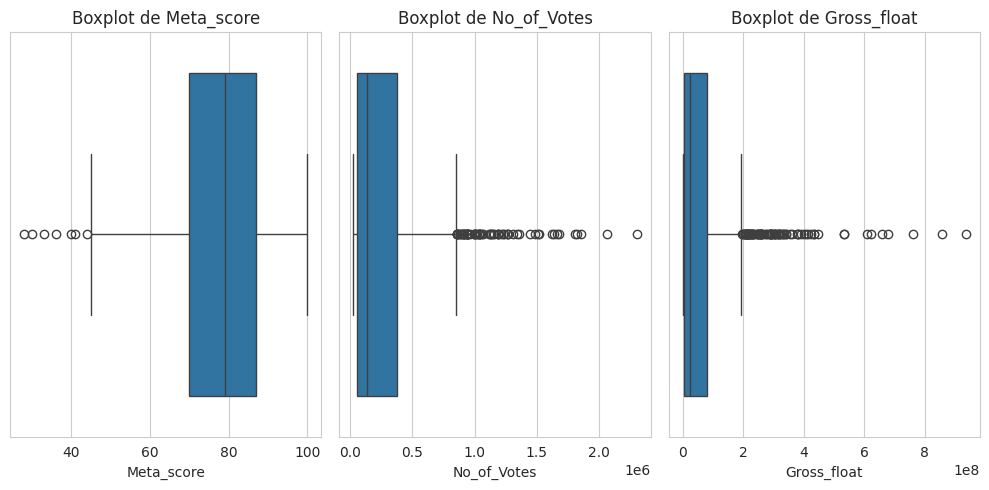

In [ ]:
# plotando boxplots para as colunas numéricas
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

sns.boxplot(x=df_filme['Meta_score'], ax=axes[0])
axes[0].set_title('Boxplot de Meta_score')

sns.boxplot(x=df_filme['No_of_Votes'], ax=axes[1])
axes[1].set_title('Boxplot de No_of_Votes')

sns.boxplot(x=df_filme['Gross_float'], ax=axes[2])
axes[2].set_title('Boxplot de Gross_float')

plt.tight_layout()
plt.show()

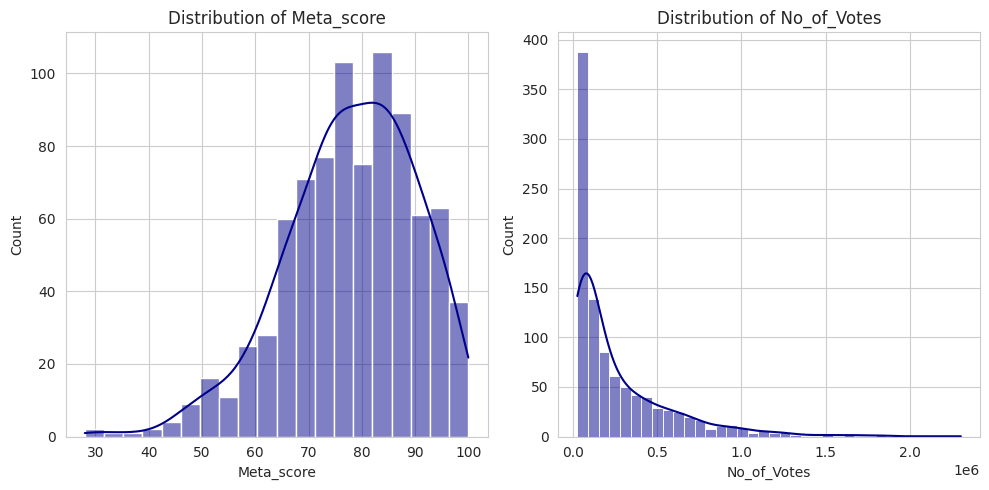

In [ ]:
# plotando histogramas para verificarmos a distribuição das variáveis selecionadas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df_filme['Meta_score'], ax=axes[0], kde=True, color= 'darkblue')
axes[0].set_title('Distribution of Meta_score')

sns.histplot(df_filme['No_of_Votes'], ax=axes[1], kde=True, color= 'darkblue')
axes[1].set_title('Distribution of No_of_Votes')

plt.tight_layout()
plt.show()

In [ ]:
# tratando os valores ausentes e preenchendo 'Meta_score' e 'Gross_float' com a mediana
df_filme['Meta_score'].fillna(df_filme['Meta_score'].median(), inplace=True)
df_filme['Gross_float'].fillna(df_filme['Gross_float'].median(), inplace=True)

A 'fillna' preenche quaisquer valores ausentes (NaN) na coluna, e as mudanças são aplicadas diretamente no DataFrame.

No caso do tratamento das colunas "Meta_Score" e "Gross_float" optei por usar a mediana, garantindo que os valores ausentes não fossem afetados pelos outliers existentes.

In [ ]:
# preenchendo 'Certificate' com a moda (valor mais frequente)
df_filme['Certificate'].fillna(df_filme['Certificate'].mode()[0], inplace=True)

Escolhi preencher quaisquer valores ausentes na coluna "Certificate" com o valor que mais aparece na coluna (moda). Essa é uma estratégia relativamente comum para lidar com dados categóricos ausentes, pois ao usarmos o valor mais frequente temos menos probabilidade de introduzir viéses em comparação com outros métodos, como por exemplo usarmos um valor substituto.

##  Análise Exploratória dos Dados (EDA)

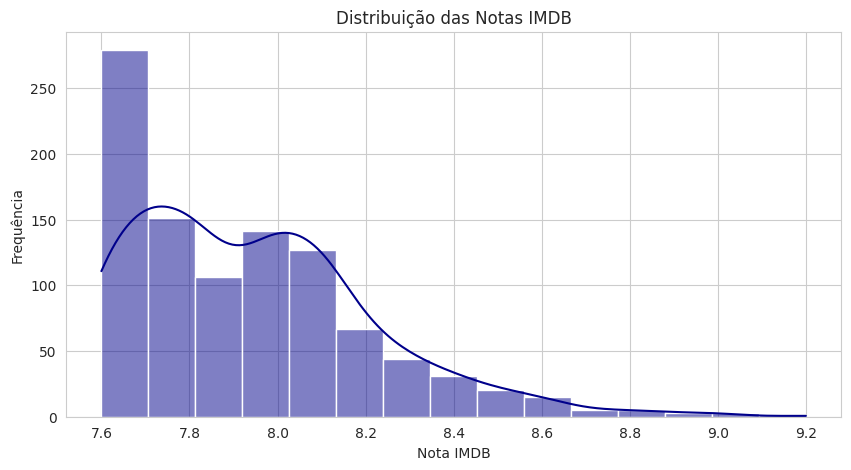

In [ ]:
# plotando gráfico: Distribuição das Notas IMDB
plt.figure(figsize=(10, 5))

sns.histplot(df_filme['IMDB_Rating'], bins=15, kde=True, color='darkblue')
plt.title('Distribuição das Notas IMDB', fontsize=12)
plt.xlabel('Nota IMDB', fontsize=10)
plt.ylabel('Frequência', fontsize=10)
plt.savefig('imdb_rating_distribution.png')

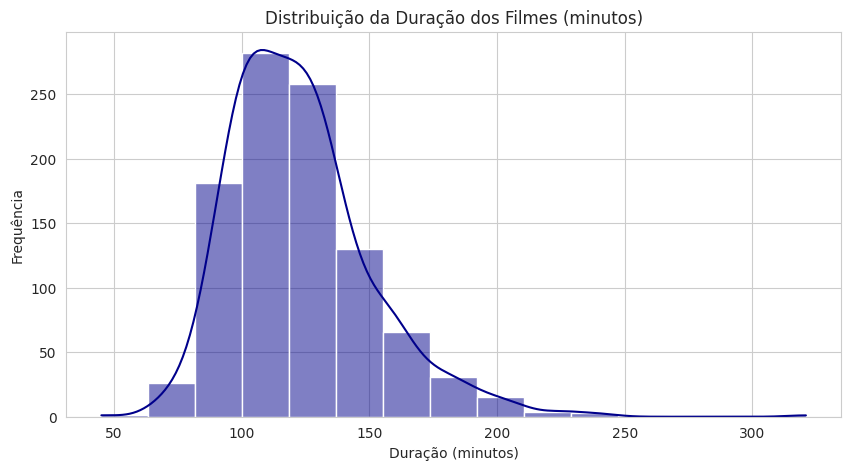

In [ ]:
# plotando gráfico: Distribuição da Duração dos Filmes
plt.figure(figsize=(10, 5))

sns.histplot(df_filme['Runtime (min)'], bins=15, kde=True, color='darkblue')
plt.title('Distribuição da Duração dos Filmes (minutos)', fontsize=12)
plt.xlabel('Duração (minutos)', fontsize=10)
plt.ylabel('Frequência', fontsize=10)
plt.savefig('runtime_distribution.png')

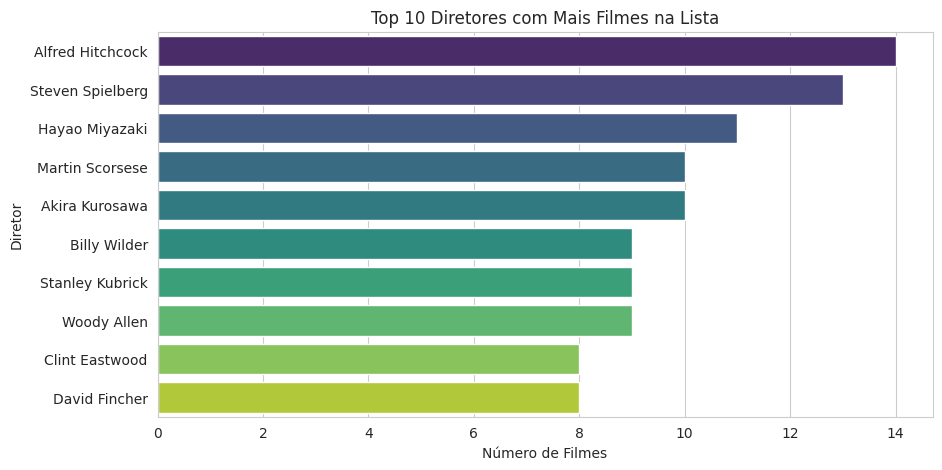

In [ ]:
# plotando gráfico: Top 10 Diretores com Mais Filmes
plt.figure(figsize=(10, 5))

top_directors = df_filme['Director'].value_counts().nlargest(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Diretores com Mais Filmes na Lista', fontsize=12)
plt.xlabel('Número de Filmes', fontsize=10)
plt.ylabel('Diretor', fontsize=10)
plt.savefig('top_directors.png')

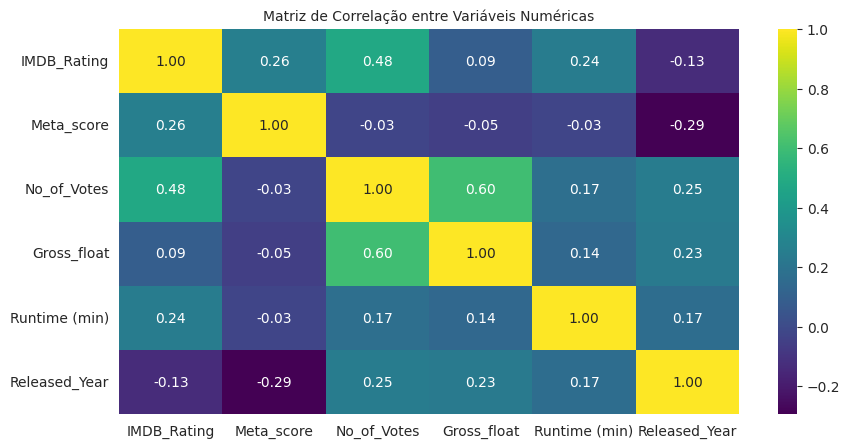

In [ ]:
# plotando gráfico: Matriz de Correlação
plt.figure(figsize=(10, 5))

numerical_cols = df_filme[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross_float', 'Runtime (min)', 'Released_Year']]
corr_matrix = numerical_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=10)
plt.savefig('correlation_matrix.png')

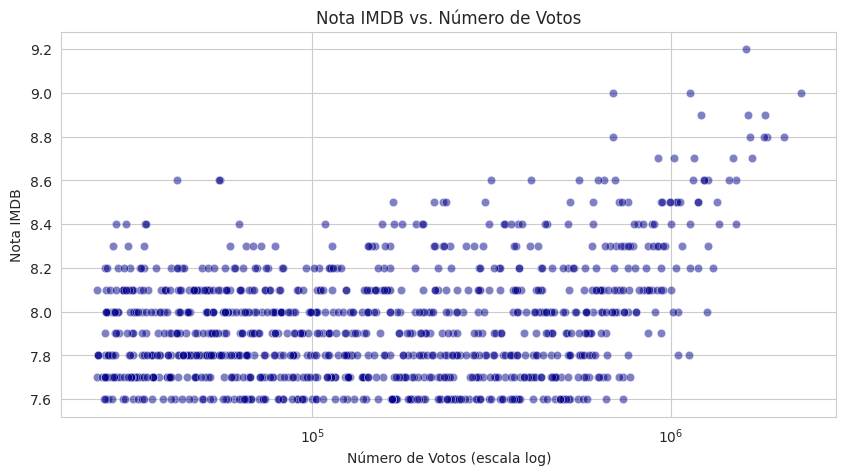

In [ ]:
# plotando gráfico: Nota IMDB vs. Número de Votos
plt.figure(figsize=(10, 5))

sns.scatterplot(data=df_filme, x='No_of_Votes', y='IMDB_Rating', alpha=0.5, color='darkblue')
plt.title('Nota IMDB vs. Número de Votos', fontsize=12)
plt.xlabel('Número de Votos (escala log)', fontsize=10)
plt.ylabel('Nota IMDB', fontsize=10)
plt.xscale('log')
plt.savefig('votes_vs_rating.png')

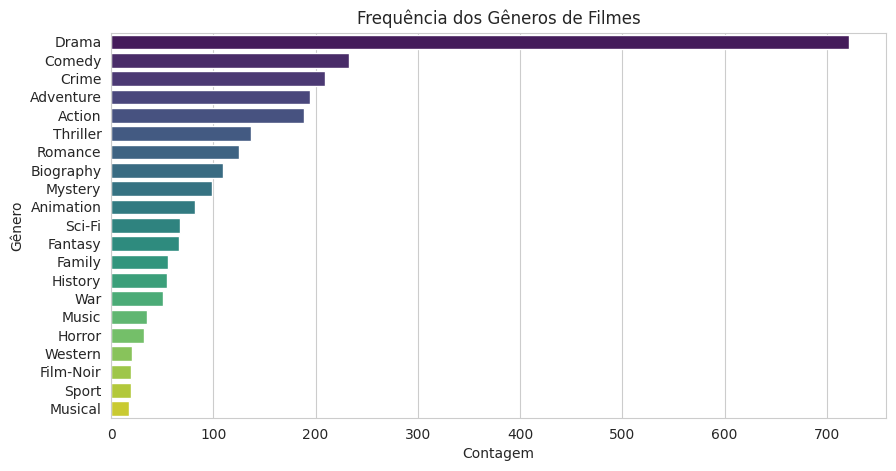

In [ ]:
# plotando gráfico: Frequência dos Gêneros de Filmes
all_genres = [genre for sublist in df_filme['Genre'].str.split(', ') for genre in sublist]
genre_counts = pd.Series(all_genres).value_counts()
plt.figure(figsize=(10, 5))

sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Frequência dos Gêneros de Filmes', fontsize=12)
plt.xlabel('Contagem', fontsize=10)
plt.ylabel('Gênero', fontsize=10)
plt.savefig('genre_frequency.png')

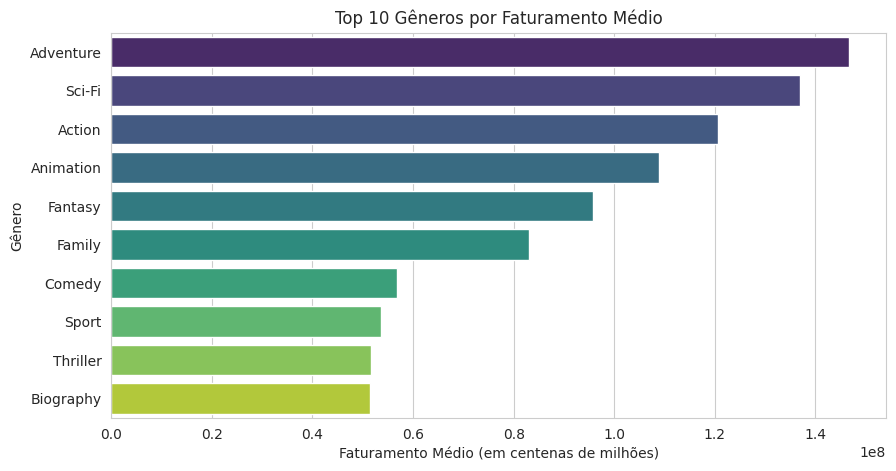

In [ ]:
# desagrupando gêneros dos filmes para uma análise individual
df_genre = df_filme.assign(Genre=df_filme['Genre'].str.split(', ')).explode('Genre')
avg_gross_by_genre = df_genre.groupby('Genre')['Gross_float'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_gross_by_genre.values, y=avg_gross_by_genre.index, palette='viridis')
plt.title('Top 10 Gêneros por Faturamento Médio', fontsize=12)
plt.xlabel('Faturamento Médio (em centenas de milhões)', fontsize=10)
plt.ylabel('Gênero', fontsize=10)
plt.savefig('avg_gross_by_genre.png', bbox_inches='tight')


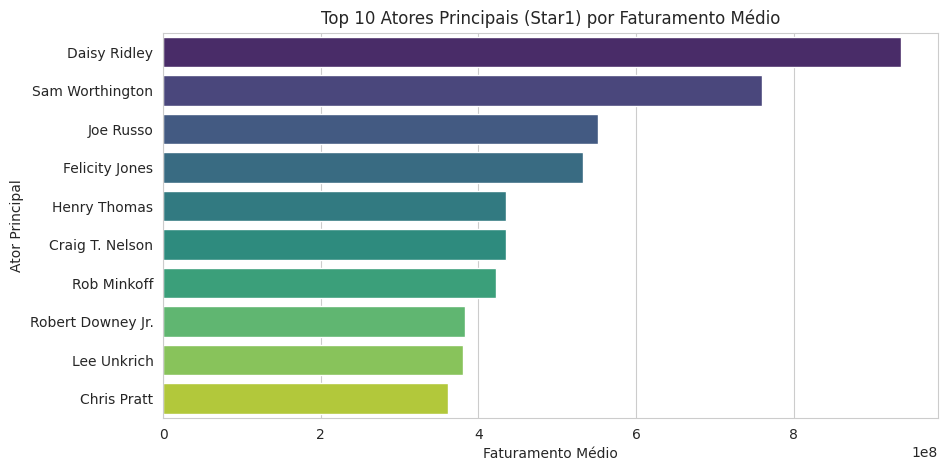

In [ ]:
# qual ator principal (Star1) é mais rentável
avg_gross_by_star1 = df_filme.groupby('Star1')['Gross_float'].mean().sort_values(ascending=False)

# plotando gráfico: "Top 10 Atores Principais por Faturamento Médio"
plt.figure(figsize=(10, 5))

avg_gross_by_star1_top10 = avg_gross_by_star1.head(10)
sns.barplot(x=avg_gross_by_star1_top10.values, y=avg_gross_by_star1_top10.index, palette='viridis')
plt.title('Top 10 Atores Principais (Star1) por Faturamento Médio', fontsize=12)
plt.xlabel('Faturamento Médio', fontsize=10)
plt.ylabel('Ator Principal', fontsize=10)
plt.show()

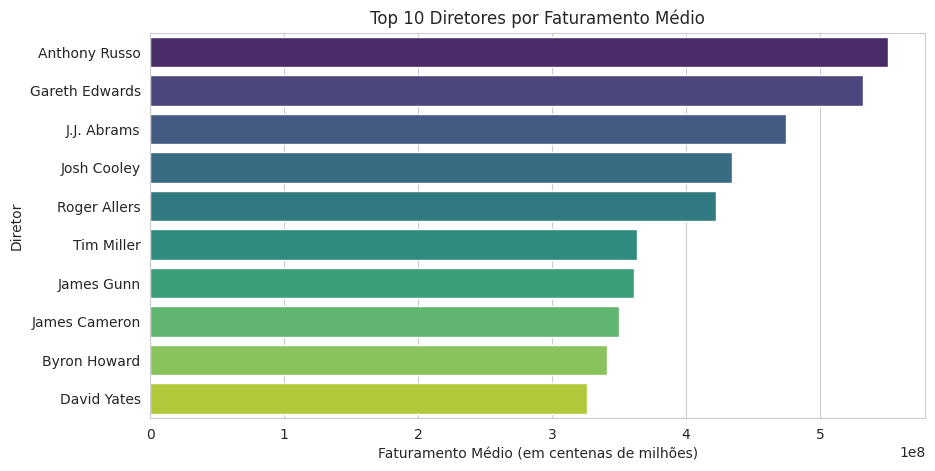

In [ ]:
# qual o diretor é mais rentável?
avg_gross_by_director = df_filme.groupby('Director')['Gross_float'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_gross_by_director.values, y=avg_gross_by_director.index, palette='viridis')
plt.title('Top 10 Diretores por Faturamento Médio', fontsize=12)
plt.xlabel('Faturamento Médio (em centenas de milhões)', fontsize=10)
plt.ylabel('Diretor', fontsize=10)
plt.savefig('avg_gross_by_director.png', bbox_inches='tight')

## Treinando o modelo

In [ ]:
# selecionando features (variáveis independentes) e target (variável dependente)
features = ['Meta_score', 'No_of_Votes', 'Gross_float', 'Runtime (min)']
target = 'IMDB_Rating'

X = df_filme[features]
y = df_filme[target]

# dividir em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# treinando os dados
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X, y)

# preparando dados do filme para a previsão (Exemplo: Avatar)
movie_to_predict = {
    'Meta_score': [83.0],
    'No_of_Votes': [1367752],
    'Gross_float': [2847246203.0],
    'Runtime (min)': [162]
}
predict_df = pd.DataFrame(movie_to_predict)

# previsão
predicted_rating = model.predict(predict_df)
print(f"\nA nota IMDB prevista para 'Avatar' é: {predicted_rating[0]:.2f}\n")




A nota IMDB prevista para 'Avatar' é: 8.40



Primeiro, defini as features (variáveis independentes) que serão usadas para a previsão (Meta_score, No_of_Votes, Gross_float, Runtime_int) e o target (variável dependente) que queremos prever (IMDB_Rating).

Em seguida, dividi os dados em conjuntos de treino e teste para uma avaliação robusta do modelo. No entanto, para a previsão final e salvamento do modelo, ele treina o modelo com todos os dados usando um RandomForestRegressor, que é um algoritmo de aprendizado de máquina.

Escolhi o filme "Avatar" tendo em vista que vários aspectos o faz se destacar entre os demais, tais como: Faturamento (Gross) e Nota do IMDB.

Depois, preparei os dados de um filme específico ('Avatar') em um DataFrame para fazer a previsão.

Finalmente, usei o modelo treinado para prever a nota IMDB para este filme e imprime o resultado formatado.

### Aplicando o modelo preditivo

In [ ]:
# previsões no conjunto de teste
y_pred = model.predict(X_test)

# avaliando o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Métricas de Avaliação do Modelo:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Métricas de Avaliação do Modelo:
Mean Absolute Error (MAE): 0.0578
Mean Squared Error (MSE): 0.0058
Root Mean Squared Error (RMSE): 0.0761
R-squared (R²): 0.9121


Após o modelo treinado, vamos as próximas etapas:

Para avaliar o desempenho do modelo: ao utilizarmos métricas apropriadas (como Erro Médio Absoluto - MAE, Raiz do Erro Quadrático Médio - RMSE, ou R²) no conjunto de teste (X_test, y_test) entendemos quão bem o modelo generaliza para dados que ele não viu durante o treinamento.

Já para a análise de importância das features: verifica-se quais das features ('Meta_score', 'No_of_Votes', 'Gross_float', 'Runtime (min)') tiveram maior influência na previsão da nota IMDB. Isso pode ajudar a entender melhor os fatores que mais impactam as avaliações.

Quanto ao possível refinamento do modelo: com base na avaliação, podemos considerar ajustar os parâmetros do RandomForestRegressor ou explorar outros algoritmos de machine learning para tentar melhorar a precisão das previsões.

E ao explorarmos outros filmes para previsão podemos aplicar o modelo treinado para prever a nota IMDB de outros filmes de interesse.

### Modelo Treinado

In [ ]:
# salvando o modelo treinado
model_filename = 'imdb_rating_predictor.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Modelo salvo com sucesso no arquivo: '{model_filename}'")

# gerando o arquivo "requirements.txt"
requirements_filename = 'requirements.txt'
try:
    with open(requirements_filename, 'w') as f:
        # Usamos 'pip freeze' para capturar as versões exatas dos pacotes
        subprocess.run(['pip', 'freeze'], stdout=f, check=True, text=True)
    print(f"Arquivo '{requirements_filename}' gerado com sucesso.")
except Exception as e:
    print(f"Não foi possível gerar o requirements.txt via subprocesso. Erro: {e}")
    print("Você pode gerar o arquivo manualmente executando 'pip freeze > requirements.txt' no seu terminal.")


Modelo salvo com sucesso no arquivo: 'imdb_rating_predictor.pkl'
Arquivo 'requirements.txt' gerado com sucesso.
